# Linear Regression Example

In [20]:
import pandas as pd
import numpy as np

In [21]:
# import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [22]:
# read housing data - this is artificially created
df = pd.read_csv('USA_Housing.csv')

In [23]:
df.head(4)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1059033.557870,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1505890.914847,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1058987.987876,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1260616.806629,USS Barnett\nFPO AP 44820


In [24]:
df['Price in Mln'] = df['Price'] / 1000000;
df.head(4)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address,Price in Mln
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1059033.557870,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701...",1.059034
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1505890.914847,"188 Johnson Views Suite 079\nLake Kathleen, CA...",1.505891
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1058987.987876,"9127 Elizabeth Stravenue\nDanieltown, WI 06482...",1.058988
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1260616.806629,USS Barnett\nFPO AP 44820,1.260617


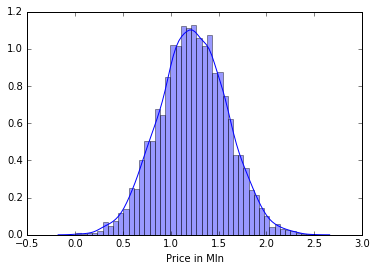

In [25]:
sb.distplot(df['Price in Mln'])

In [27]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address',
       'Price in Mln'],
      dtype='object')

In [30]:
# get feature and output vectors
X = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]
y = df['Price']

In [31]:
# import scikit learn modules

from sklearn.model_selection import train_test_split

In [38]:
# here we are splitting total data into Training data and Test data
# Ideally we split into three parts, training, test and cross-validation but lets do only test for now in this case

# this takes 25% of data as test data and it randomly shuffles the entire data set before splitting it
# shuffling is important as it removes any regularities (eg if data is sorted) and helps in better distribution

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

In [39]:
# import Linear regression model
from sklearn.linear_model import LinearRegression

In [40]:
# instantiate a Linear Regression object
lm = LinearRegression()

In [44]:
# Now fit the model using the training data

# we don't assign the output to any other variables because it will be part of the object itself

lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [45]:
print(lm.intercept_)

-2631944.71603


In [47]:
print(lm.coef_)

[  2.15913522e+01   1.65126417e+05   1.20199088e+05   4.74973106e+02
   1.53378187e+01]


In [51]:
coeff_df = pd.DataFrame(lm.coef_, X_train.columns, columns=['Coeff'])

In [52]:
coeff_df

,Coeff
Avg. Area Income,21.591352
Avg. Area House Age,165126.417209
Avg. Area Number of Rooms,120199.087506
Avg. Area Number of Bedrooms,474.973106
Area Population,15.337819


# Predictions

In [54]:
# Now that our model is trained, we can use it to predict
predictions = lm.predict(X_test)

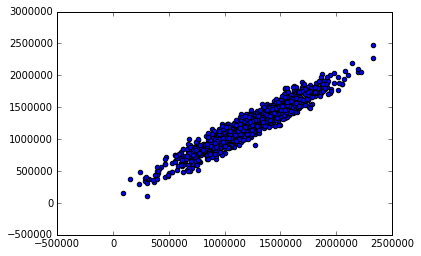

In [58]:
# plot the actual value wrt predicted value
plt.scatter(y_test, predictions)

The predicted values are very close to actual values so the model fit is good.

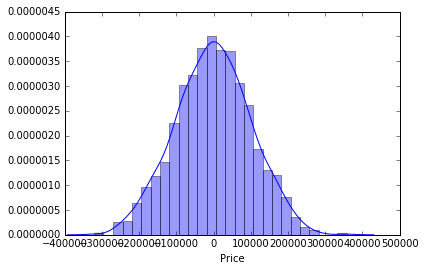

In [60]:
# check the distribution of error

sb.distplot(y_test - predictions)

Normal distribution of error means this model is the correct choice for this data. If that is not the case then we have to tune the model (eg select different features etc)

In [61]:
from sklearn import metrics

In [66]:
metrics.mean_absolute_error(y_test, predictions)

80713.28403262046

In [67]:
metrics.mean_squared_error(y_test, predictions)

10194854910.630449

In [68]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))

100969.57418267371